
# Analysis of Hospital Admission Data: Understanding Patient Stay Duration

## Dataset Description

The dataset contains the following columns:

- **case_id**: Unique ID for each case registered in the hospital.
- **Hospital_code**: Unique code assigned to each hospital.
- **Hospital_type_code**: Unique code indicating the type of hospital.
- **City_Code_Hospital**: City code where the hospital is located.
- **Hospital_region_code**: Code representing the region where the hospital is situated.
- **Available Extra Rooms in Hospital**: Number of extra rooms available in the hospital.
- **Department**: Department overseeing the case in the hospital.
- **Ward_Type**: Code representing the type of ward.
- **Ward_Facility_Code**: Code representing the facility of the ward.
- **Bed Grade**: Condition of the bed in the ward.
- **patientid**: Unique ID assigned to each patient.
- **City_Code_Patient**: City code of the patient.
- **Type of Admission**: Type of admission registered by the hospital.
- **Severity of Illness**: Severity of the illness recorded at the time of admission.
- **Visitors with Patient**: Number of visitors accompanying the patient.
- **Age**: Age of the patient.
- **Admission_Deposit**: Deposit amount made at the time of admission.
- **Stay**: Duration of stay in the hospital by the patient.


## importing  all necessary libraries 

In [2]:
## importing  all necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

## Load Datasets

In [3]:
## Load Datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [6]:
test_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [7]:
train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

## Concatenate train_data and test_data

In [8]:
## Concatenate train_data and test_data
data = pd.concat([train_data, test_data], ignore_index=True)
print(data.shape)


(455495, 18)


In [21]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'TotalVisitors', 'Room_Visitors_Interact'],
      dtype='object')

In [23]:
print(data.isnull().sum())

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
TotalVisitors                        0
Room_Visitors_Interact               0
dtype: int64


## Data Exploration and Preprocessing

In [24]:
# Handling missing values
data.dropna(inplace=True)

In [25]:
print(data.isnull().sum())

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
TotalVisitors                        0
Room_Visitors_Interact               0
dtype: int64


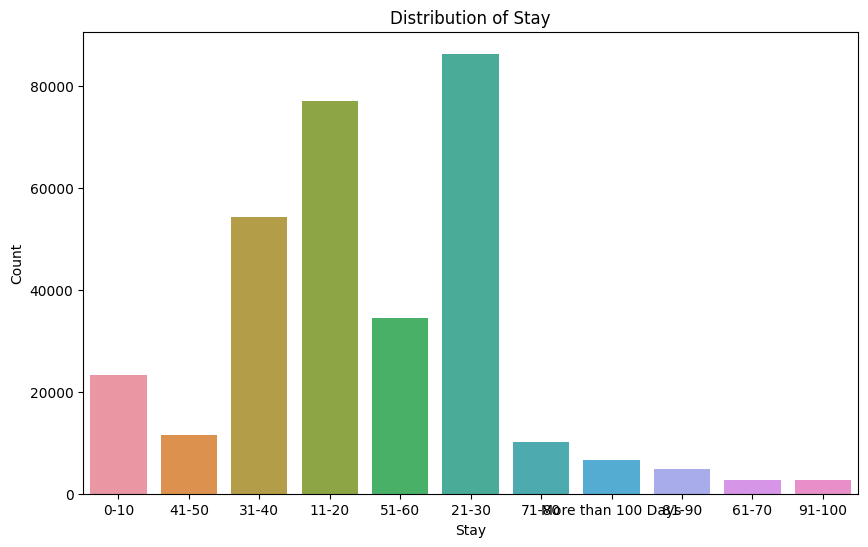

In [26]:
# Visualize the distribution of target variable 'Stay'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Stay')
plt.title('Distribution of Stay')
plt.xlabel('Stay')
plt.ylabel('Count')
plt.show()

/var/folders/yj/ms452nkn36j2l72pfsbpzqbh0000gn/T/ipykernel_59275/4122235491.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


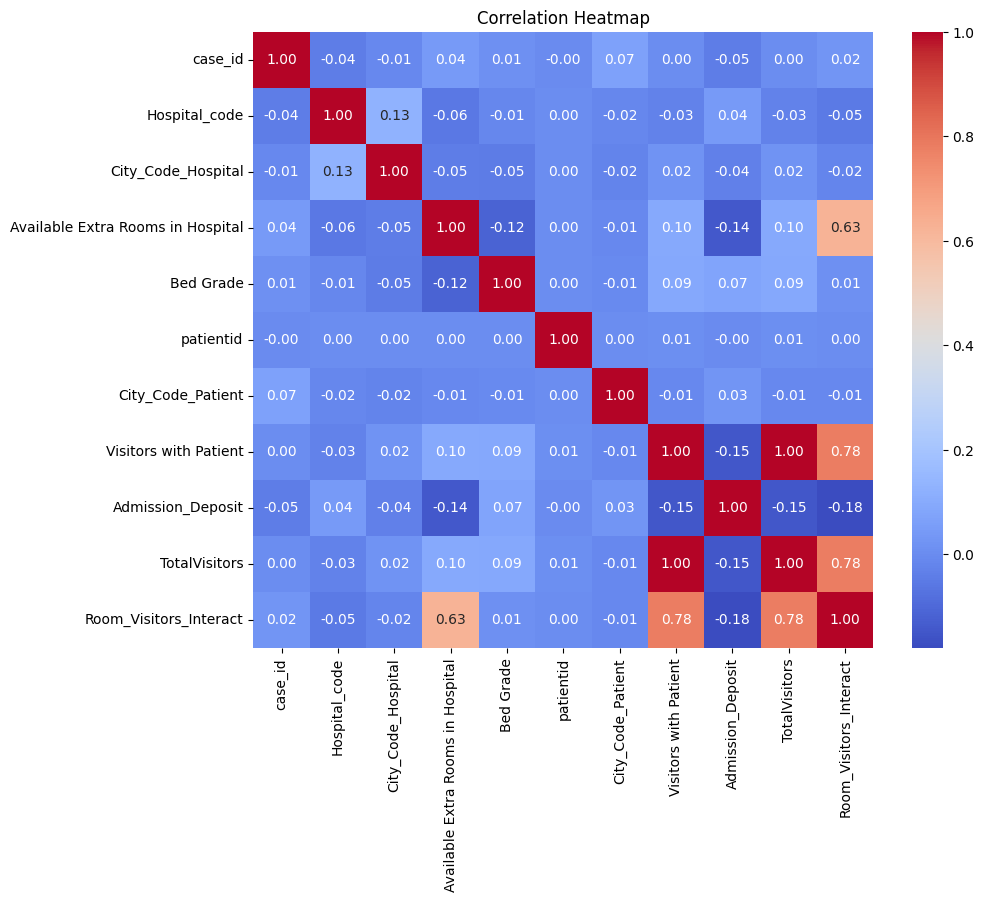

Correlation Values:
                                    case_id  Hospital_code  \
case_id                            1.000000      -0.042911   
Hospital_code                     -0.042911       1.000000   
City_Code_Hospital                -0.010386       0.128403   
Available Extra Rooms in Hospital  0.042452      -0.059348   
Bed Grade                          0.012282      -0.013627   
patientid                         -0.003871       0.002262   
City_Code_Patient                  0.065213      -0.015709   
Visitors with Patient              0.000647      -0.028103   
Admission_Deposit                 -0.045276       0.044950   
TotalVisitors                      0.000647      -0.028103   
Room_Visitors_Interact             0.024176      -0.051226   

                                   City_Code_Hospital  \
case_id                                     -0.010386   
Hospital_code                                0.128403   
City_Code_Hospital                           1.000000   
Availab

In [27]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Print correlation values
print("Correlation Values:")
print(correlation_matrix)




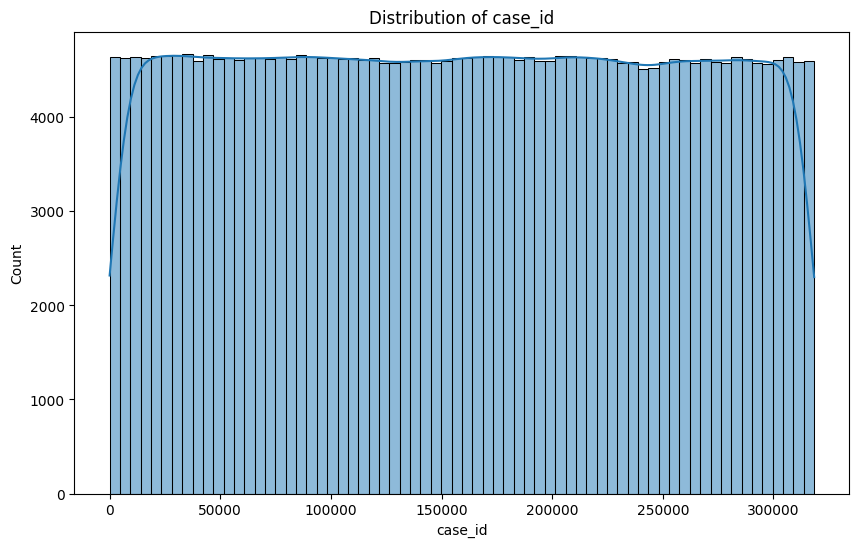

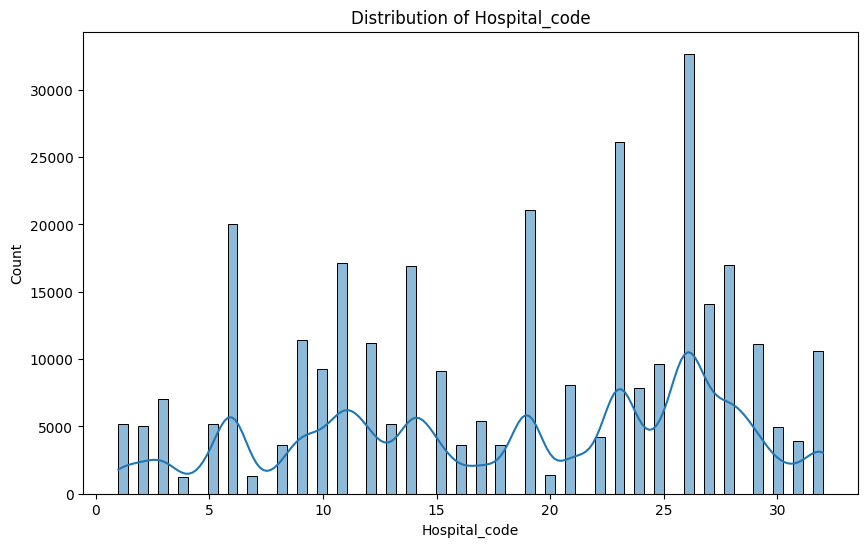

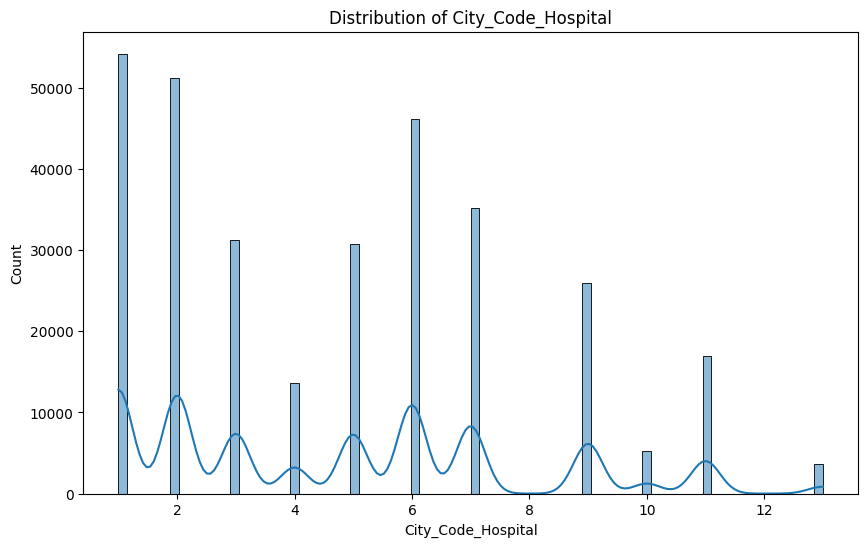

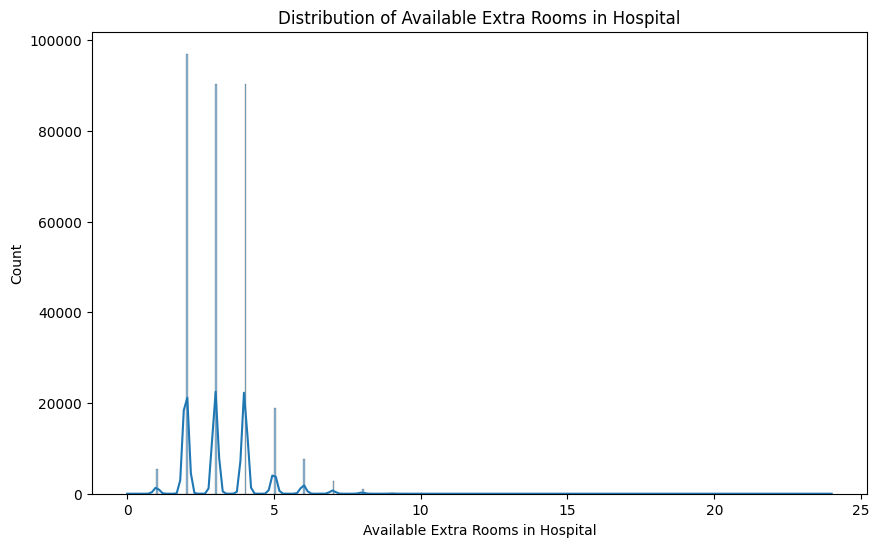

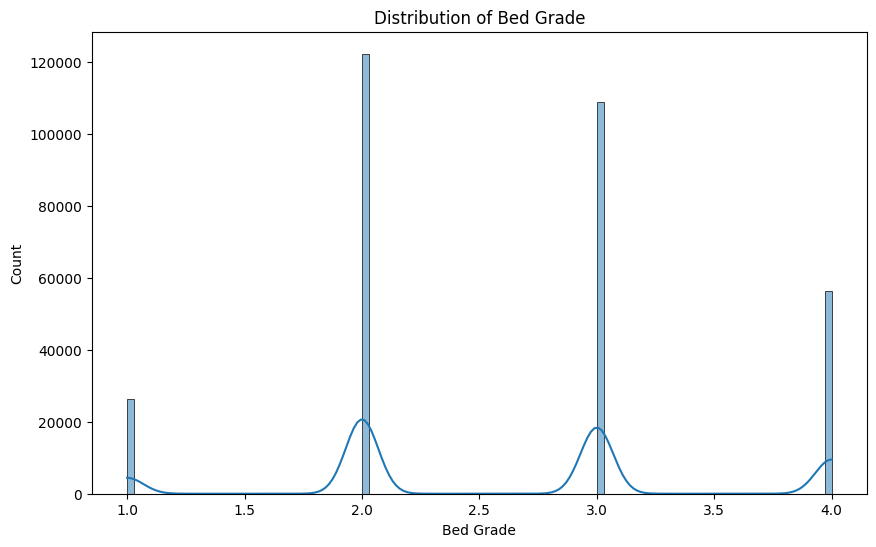

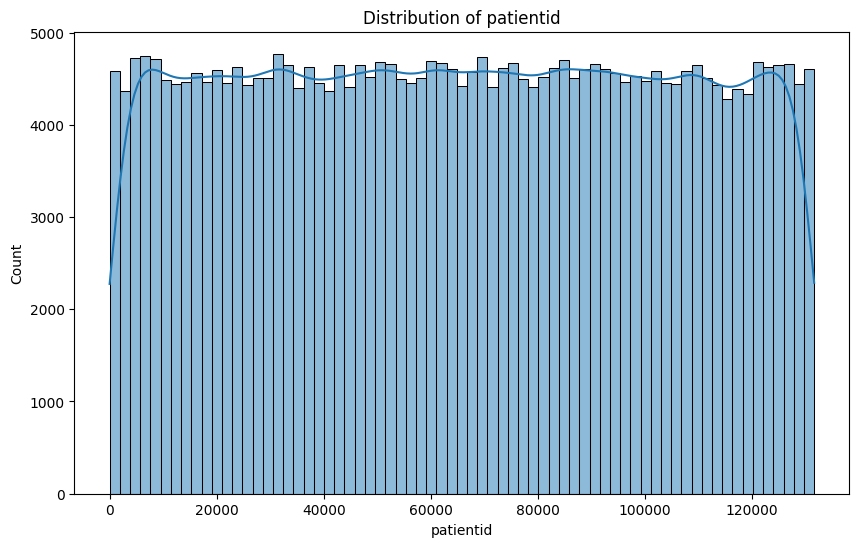

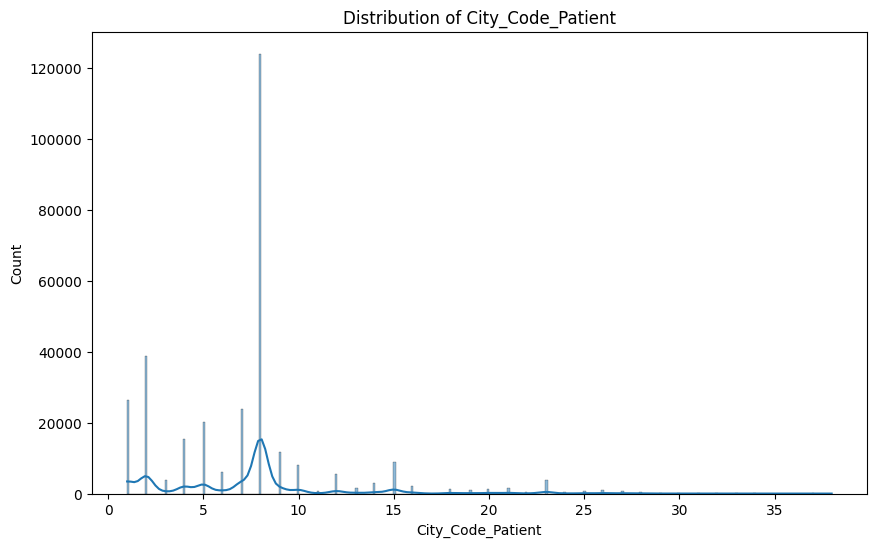

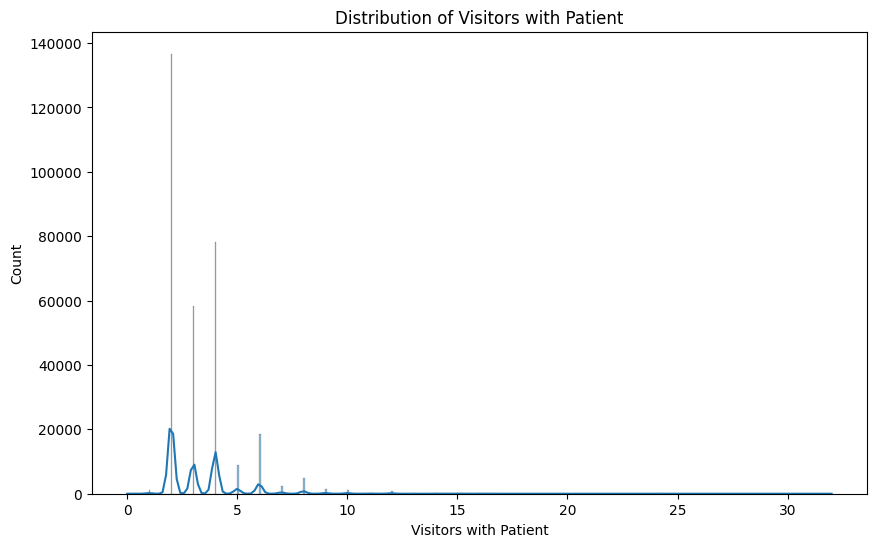

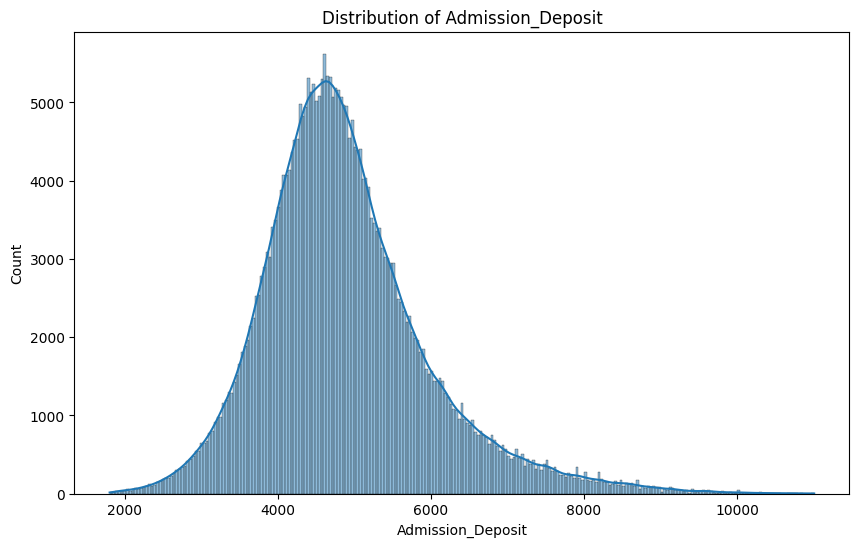

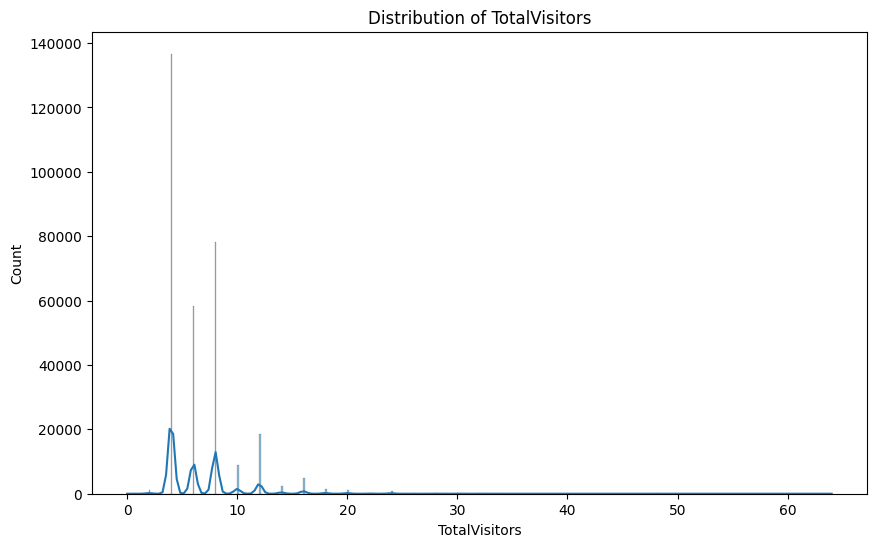

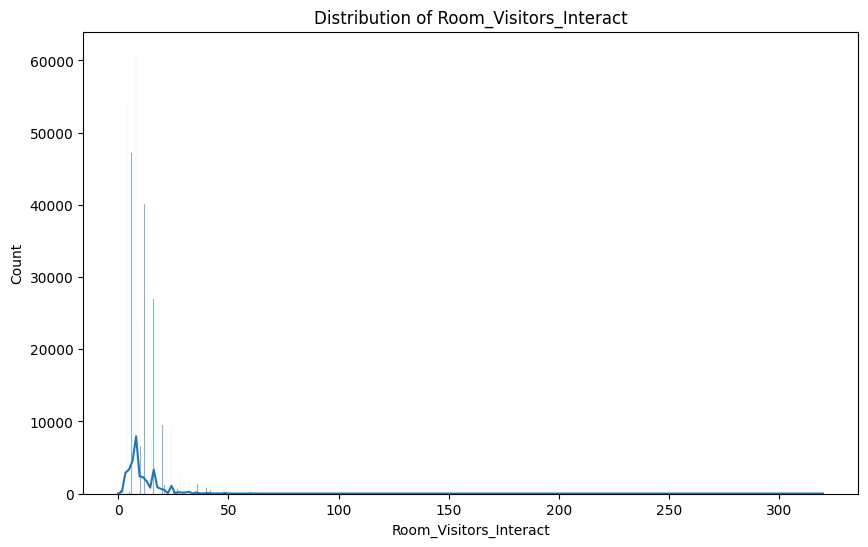

In [28]:
# Visualize the distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

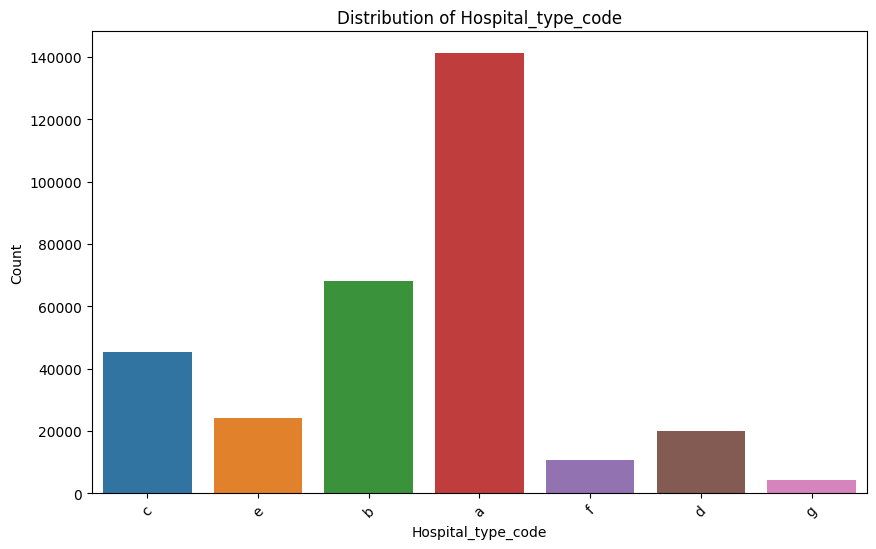

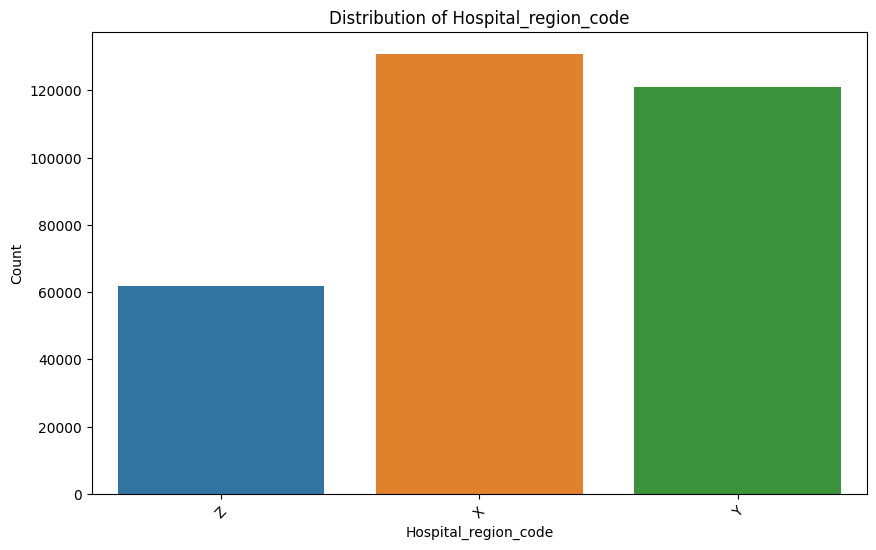

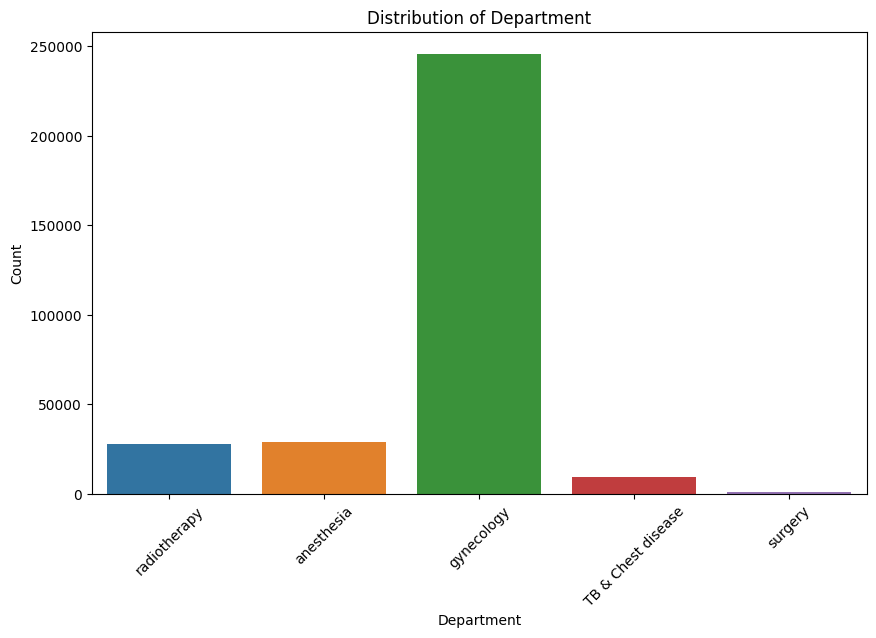

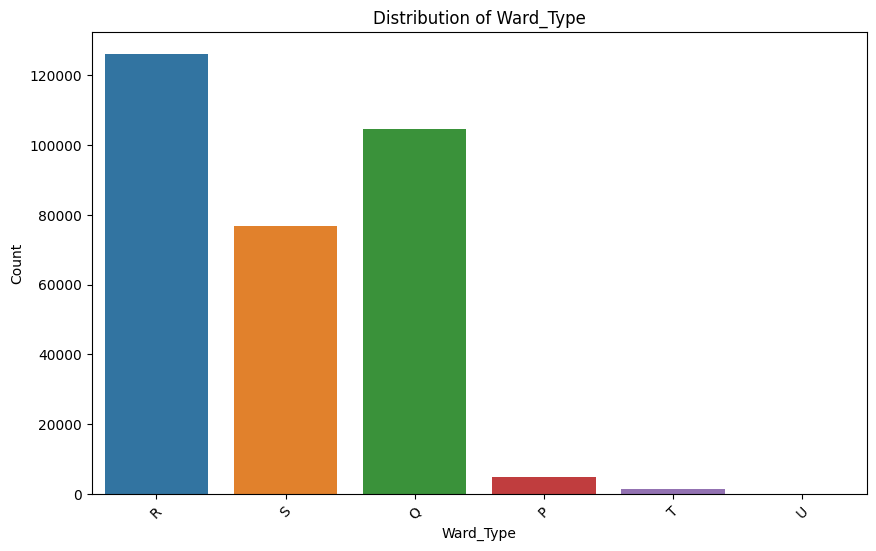

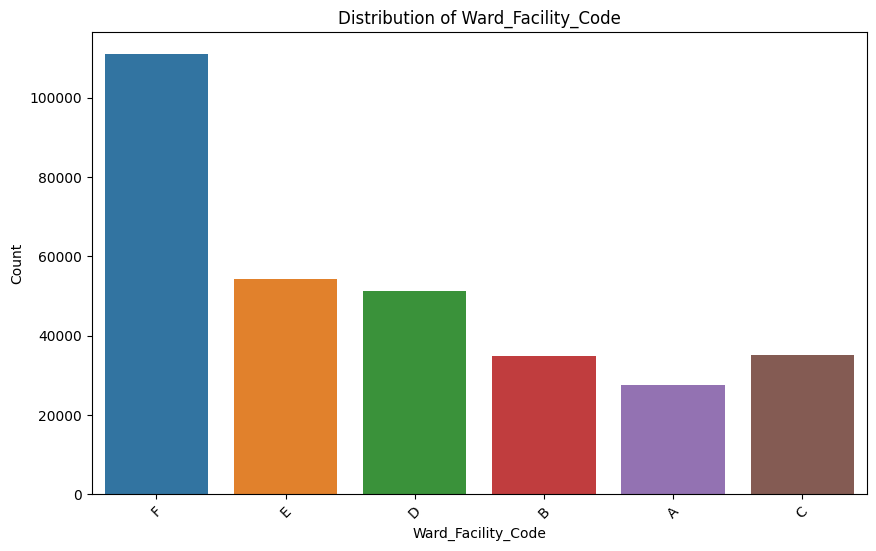

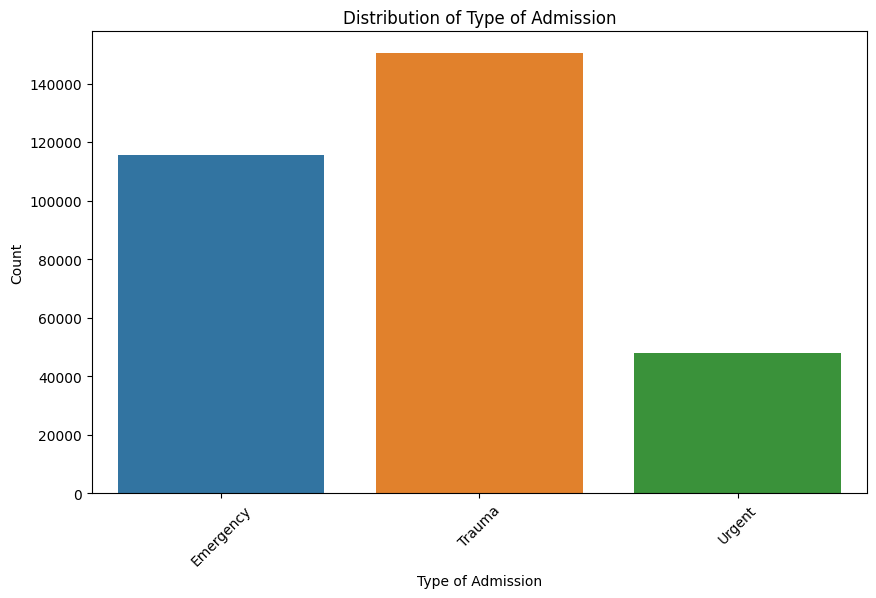

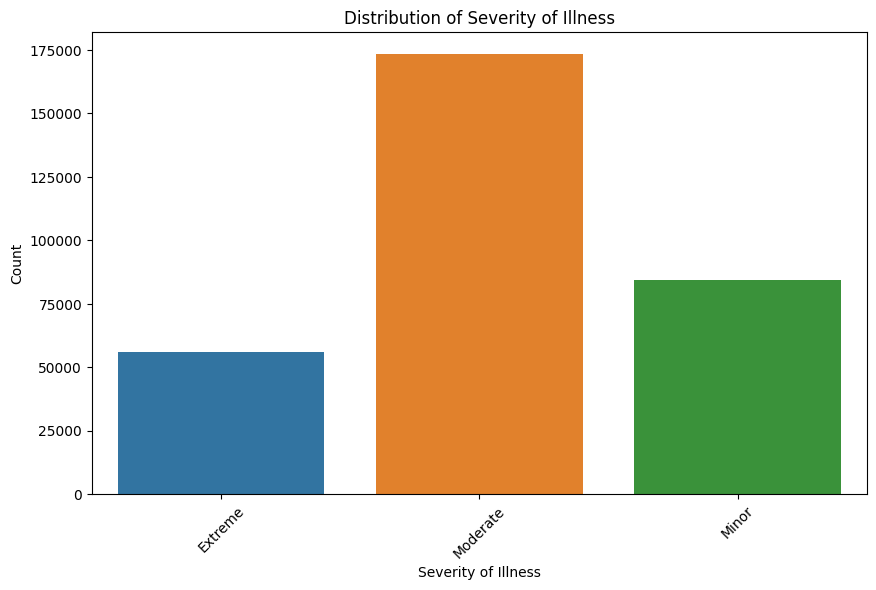

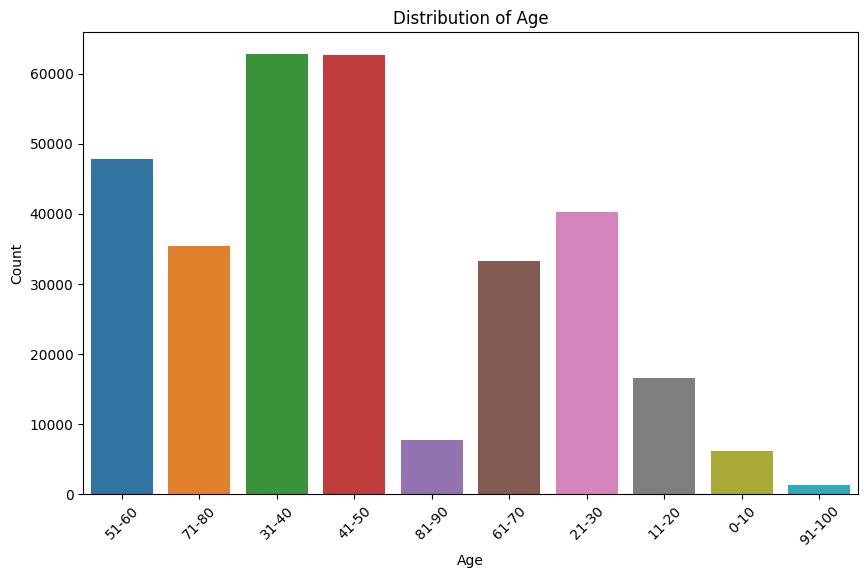

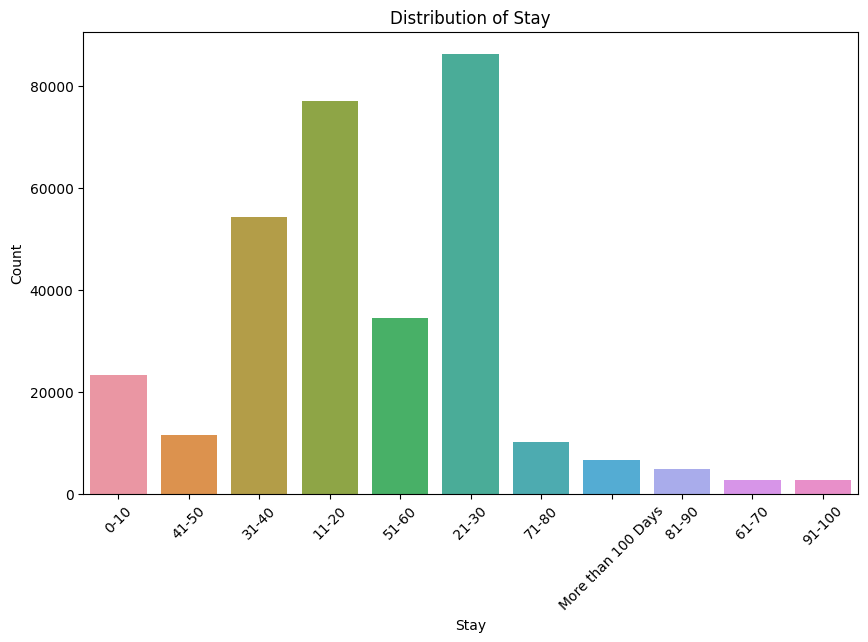

In [29]:
# Visualize the distribution of categorical features
categorical_features = data.select_dtypes(include='object').columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Feature Engineering

1. **Feature Extraction:** Created a new feature 'TotalVisitors' by adding the 'Visitors with Patient' feature twice.

2. **Handling Categorical Variables:** Applied one-hot encoding for categorical variables such as 'Hospital_type_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', and 'Age'.

3. **Handling Numerical Variables:** Applied log transformation to the 'Admission_Deposit' feature.

4. **Feature Crosses:** Created an interaction term 'Room_Visitors_Interact' by multiplying 'Available Extra Rooms in Hospital' and 'Visitors with Patient'.

In [30]:
# Feature Extraction (Example: Create new feature 'TotalVisitors' by adding 'Visitors with Patient' and 'Visitors with Patient')
data['TotalVisitors'] = data['Visitors with Patient'] + data['Visitors with Patient']


In [31]:

# Handling Categorical Variables (Example: One-hot encoding for categorical variables)
combined_data = pd.get_dummies(data, columns=['Hospital_type_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age'])

In [32]:

# Handling Numerical Variables (Example: Log transformation for 'Admission_Deposit')
combined_data['Admission_Deposit_log'] = np.log1p(combined_data['Admission_Deposit'])


<IPython.core.display.Javascript object>

In [33]:
# Feature Crosses (Example: Create interaction term between 'Available Extra Rooms in Hospital' and 'Visitors with Patient')
data['Room_Visitors_Interact'] = data['Available Extra Rooms in Hospital'] * data['Visitors with Patient']


In [38]:
data.columns


Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'TotalVisitors', 'Room_Visitors_Interact'],
      dtype='object')

In [39]:
# Display the updated dataset
print("Updated Dataset after Feature Engineering:")
print(data.head())


Updated Dataset after Feature Engineering:
   case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   

  Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0         R           

## Model Selection and Training

In [40]:
# Split the Dataset
print("\nSplitting the Dataset into Training and Testing Sets...")
X = combined_data.drop(columns=['Stay'])  # Features
y = combined_data['Stay']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Splitting the Dataset into Training and Testing Sets...
Training set size: 251034
Testing set size: 62759


**Label Encoding:** Before applying SMOTE, categorical features are encoded using Label Encoding to convert categorical values into numerical values, which are required by SMOTE.

**Printing Class Distribution Before Balancing:** This step prints the distribution of the target variable (y_train) before applying SMOTE. It shows the imbalance in class distribution, highlighting the need for balancing.

**Applying SMOTE:** The SMOTE algorithm is applied to the training data (X_train_encoded and y_train) using the fit_resample() method. This generates synthetic samples for the minority class to balance the class distribution.

**Printing Class Distribution After SMOTE:** After applying SMOTE, this step prints the distribution of the target variable (y_train_resampled) to show that the class distribution is now balanced.

In [43]:
# Handling Class Imbalance (SMOTE)
print("\nHandling Class Imbalance (SMOTE)...")
encoder = LabelEncoder()
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
for col in X_train_encoded.select_dtypes(include=['object']).columns:
    X_train_encoded[col] = encoder.fit_transform(X_train_encoded[col])
    X_test_encoded[col] = encoder.transform(X_test_encoded[col])

print("Class distribution before balancing:")
print(pd.Series(y_train).value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())



Handling Class Imbalance (SMOTE)...
Class distribution before balancing:
21-30                 69138
11-20                 61789
31-40                 43345
51-60                 27471
0-10                  18548
41-50                  9204
71-80                  8141
More than 100 Days     5226
81-90                  3836
91-100                 2194
61-70                  2142
Name: Stay, dtype: int64

Class distribution after SMOTE:
31-40                 69138
0-10                  69138
21-30                 69138
81-90                 69138
11-20                 69138
51-60                 69138
61-70                 69138
More than 100 Days    69138
71-80                 69138
91-100                69138
41-50                 69138
Name: Stay, dtype: int64


In [44]:
# Train Model - Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [45]:
# Train Model - Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_resampled, y_train_resampled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [46]:
# Train Model - Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [47]:
# Evaluate Model Performance - Random Forest
y_pred_rf = model_rf.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")



Random Forest Model Performance:
Accuracy: 0.4068579805286891
Precision: 0.3886625253981262
Recall: 0.4068579805286891
F1-score: 0.3842641032164025


In [48]:
# Evaluate Model Performance - Logistic Regression
y_pred_lr = model_lr.predict(X_test_encoded)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-score: {f1_lr}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression Model Performance:
Accuracy: 0.18770216223967878
Precision: 0.15879411175955357
Recall: 0.18770216223967878
F1-score: 0.14320389849716622


In [49]:
# Evaluate Model Performance - Decision Tree
y_pred_dt = model_dt.predict(X_test_encoded)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("\nDecision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")


Decision Tree Model Performance:
Accuracy: 0.3028250928153731
Precision: 0.30672126426664525
Recall: 0.3028250928153731
F1-score: 0.3045065810429044


## eXplainable AI (XAI) 

In [27]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [59]:
import shap


**shap.TreeExplainer(model_rf):** This line initializes a TreeExplainer object from the SHAP library. A TreeExplainer is specifically designed for tree-based models like random forests. It prepares the model for calculating SHAP values by constructing an explanation object that can efficiently compute SHAP values for each feature in the dataset.

**explainer.shap_values(X_train_encoded):** This line actually calculates the SHAP values for the provided dataset (X_train_encoded). SHAP values represent the contribution of each feature to the prediction made by the model for each instance in the dataset. These values provide insights into how each feature impacts the model's predictions.

For each instance in the dataset, SHAP values explain the difference between the actual prediction and the average prediction made by the model across all instances.
Positive SHAP values indicate features that contribute to increasing the prediction, while negative SHAP values indicate features that contribute to decreasing the prediction.
SHAP values help in understanding the importance and impact of each feature on the model's decision-making process, providing interpretability and insights into the model's behavior.

In [61]:
#explainer = shap.TreeExplainer(model_rf)
#shap_values = explainer.shap_values(X_train_encoded)


In [ ]:
#shap.summary_plot(shap_values, X_train_encoded, plot_type="bar")


## Model Evaluation and Optimization

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],      
    'max_depth': [None, 10, 20],         
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'max_features': ['sqrt'],  # Set to 'sqrt' explicitly
    'bootstrap': [True, False]             
}

# Create RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(model_rf, param_distributions=param_grid_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV object
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print("Best Parameters (Random Forest):", best_params_rf)
print("Best Score (Random Forest):", best_score_rf)


Best Parameters (Random Forest): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Score (Random Forest): 0.6181983858370216


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20],        # Example values, adjust as needed
    'min_samples_split': [2, 5, 10],    # Example values, adjust as needed
    'min_samples_leaf': [1, 2, 4],      # Example values, adjust as needed
    'max_features': ['auto', 'sqrt', 'log2', None],  # Example values, adjust as needed
}

# Create RandomizedSearchCV object
random_search_dt = RandomizedSearchCV(model_dt, param_distributions=param_grid_dt, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV object
random_search_dt.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params_dt = random_search_dt.best_params_
best_score_dt = random_search_dt.best_score_

print("Best Parameters (Decision Tree):", best_params_dt)
print("Best Score (Decision Tree):", best_score_dt)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'

Best Parameters (Decision Tree): {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}
Best Score (Decision Tree): 0.4767079806132137
